In [1]:
#https://www.kaggle.com/theblackmamba31/photo-to-sketch-using-autoencoder/notebook
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential 
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Input, Activation, Flatten
from keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint 
#from keras_preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm 
import os
import re 

In [2]:
##files uploaded from drive
#https://drive.google.com/drive/folders/1BGstwm14hk4M1BdojqVnsyz8u5iBqU2U?usp=share_link
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)


# defining the size of image 
SIZE = 256

image_path = "/content/drive/MyDrive/CUHK_data/CUHK_training_cropped_photos"
img_array = []

sketch_path = '/content/drive/MyDrive/CUHK_data/CUHK_training_cropped_sketches'
sketch_array = []

image_test_path = "/content/drive/MyDrive/CUHK_data/CUHK_testing_cropped_photos"
image_test_array = []

sketch_test_path = "/content/drive/MyDrive/CUHK_data/CUHK_testing_cropped_sketches"
sketch_test_array = []

#Here we convert the images to arrays and store them in list
image_file = sorted_alphanumeric(os.listdir(image_path))
sketch_file = sorted_alphanumeric(os.listdir(sketch_path))
image_test_file = sorted_alphanumeric(os.listdir(image_test_path))
sketch_test_file = sorted_alphanumeric(os.listdir(sketch_test_path))


In [4]:
#Data augumentation is carried out due to the small amount of samples in the dataset
for i in tqdm(image_file):
    image = cv2.imread(image_path + '/' + i,1)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    
    #appending normal normal image    
    img_array.append(img_to_array(image))
    # Image Augmentation
    
    # horizontal flip 
    img1 = cv2.flip(image,1)
    img_array.append(img_to_array(img1))
     #vertical flip 
    img2 = cv2.flip(image,-1)
    img_array.append(img_to_array(img2))
     #vertical flip 
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    img_array.append(img_to_array(img3))
    # rotate clockwise 
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    img_array.append(img_to_array(img4))
    # flip rotated image 
    img5 = cv2.flip(img4,1)
    img_array.append(img_to_array(img5))
     # rotate anti clockwise 
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    img_array.append(img_to_array(img6))
    # flip rotated image 
    img7 = cv2.flip(img6,1)
    img_array.append(img_to_array(img7))
    
for i in tqdm(sketch_file):
    image = cv2.imread(sketch_path + '/' + i,1)
      
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
      
    # normalizing image 
    image = image.astype('float32') / 255.0
    # appending normal sketch image
    sketch_array.append(img_to_array(image))
      
    #Image Augmentation
    # horizontal flip 
    img1 = cv2.flip(image,1)
    sketch_array.append(img_to_array(img1))
    #vertical flip 
    img2 = cv2.flip(image,-1)
    sketch_array.append(img_to_array(img2))
    #vertical flip 
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    sketch_array.append(img_to_array(img3))
    # rotate clockwise 
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    sketch_array.append(img_to_array(img4))
    # flip rotated image 
    img5 = cv2.flip(img4,1)
    sketch_array.append(img_to_array(img5))
    # rotate anti clockwise 
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    sketch_array.append(img_to_array(img6))
    # flip rotated image 
    img7 = cv2.flip(img6,1)
    sketch_array.append(img_to_array(img7))
      

100%|██████████| 88/88 [00:20<00:00,  4.20it/s]


In [5]:
for i in tqdm(image_test_file):
    image = cv2.imread(image_test_path + '/' + i,1)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    
    #appending normal normal image    
    image_test_array.append(img_to_array(image))

for i in tqdm(sketch_test_file):
    image = cv2.imread(sketch_test_path + '/' + i,1)
      
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
      
    # normalizing image 
    image = image.astype('float32') / 255.0
    # appending normal sketch image
    sketch_test_array.append(img_to_array(image))

100%|██████████| 100/100 [00:25<00:00,  3.94it/s]


In [6]:
print("Total number of sketch images:",len(sketch_array))
print("Total number of images:",len(img_array))
print(len(img_array[1]))

Total number of sketch images: 704
Total number of images: 704
256


In [7]:
#Slicing and reshaping
#There are 704 train images and 100 test images 
#After slicing the image array, we reshaped them so that images can be fed directly into the encoder network

train_sketch_image = sketch_array[0:]
train_image = img_array[0:]
test_sketch_image = sketch_test_array[0:]
test_image = image_test_array[0:]
# reshaping
train_sketch_image = np.reshape(train_sketch_image,(len(train_sketch_image),SIZE,SIZE,3))
train_image = np.reshape(train_image, (len(train_image),SIZE,SIZE,3))
print('Train color image shape:',train_image.shape)
test_sketch_image = np.reshape(test_sketch_image,(len(test_sketch_image),SIZE,SIZE,3))
test_image = np.reshape(test_image, (len(test_image),SIZE,SIZE,3))
print('Test color image shape',test_image.shape)

Train color image shape: (704, 256, 256, 3)
Test color image shape (100, 256, 256, 3)


In [ ]:
#Load the model if you dont want to run the process again
#from tensorflow.keras.models import load_model
#model = load_model('/content/drive/MyDrive/CUHK_data/Finalsketch2faceVGG16.h5')

In [8]:
##############VGG 16
pre_trained_model=tf.keras.applications.VGG16(input_shape=(SIZE, SIZE, 3), include_top=False, weights="imagenet")
for layer in pre_trained_model.layers:
    layer.trainable=False

'''encoder_input = keras.Input(shape = (SIZE, SIZE, 3))
encoder_output = keras.Input(shape = (SIZE, SIZE, 3)) 
for layer in pre_trained_model.layers:
  encoder_output = layer(encoder_output)'''

x=Flatten()(pre_trained_model.output)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(196608, activation='sigmoid')(x)
x = tf.keras.layers.Reshape((256,256,3))(x)

model = tf.keras.Model(pre_trained_model.input, x)
model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])


58889256/58889256 [==============================] - 0s 0us/step


In [9]:
#########TRAIN MODEL
from datetime import datetime
from keras.callbacks import EarlyStopping as E
early_stop = E(monitor = "val_loss",mode = 'min',verbose=1,patience=20)

#hist2=model.fit(train_sketch_image,train_image,validation_data=(test_sketch_image,test_image), epochs=100, callbacks=[early_stop])

##changing the hyperparameter epochs = 150
hist2=model.fit(train_sketch_image,train_image,validation_data=(test_sketch_image,test_image), epochs=150, callbacks=[early_stop])

Epoch 1/150
22/22 [==============================] - 20s 286ms/step - loss: 0.6391 - accuracy: 0.6654 - val_loss: 0.6274 - val_accuracy: 0.7790
Epoch 2/150
22/22 [==============================] - 5s 211ms/step - loss: 0.6116 - accuracy: 0.7790 - val_loss: 0.6180 - val_accuracy: 0.7881
Epoch 3/150
22/22 [==============================] - 5s 214ms/step - loss: 0.5878 - accuracy: 0.8108 - val_loss: 0.5836 - val_accuracy: 0.8454
Epoch 4/150
22/22 [==============================] - 5s 221ms/step - loss: 0.5658 - accuracy: 0.8574 - val_loss: 0.5798 - val_accuracy: 0.8519
Epoch 5/150
22/22 [==============================] - 5s 211ms/step - loss: 0.5632 - accuracy: 0.8626 - val_loss: 0.5787 - val_accuracy: 0.8620
Epoch 6/150
22/22 [==============================] - 5s 214ms/step - loss: 0.5608 - accuracy: 0.8622 - val_loss: 0.5774 - val_accuracy: 0.8548
Epoch 7/150
22/22 [==============================] - 5s 226ms/step - loss: 0.5545 - accuracy: 0.8646 - val_loss: 0.5722 - val_accuracy: 0.861

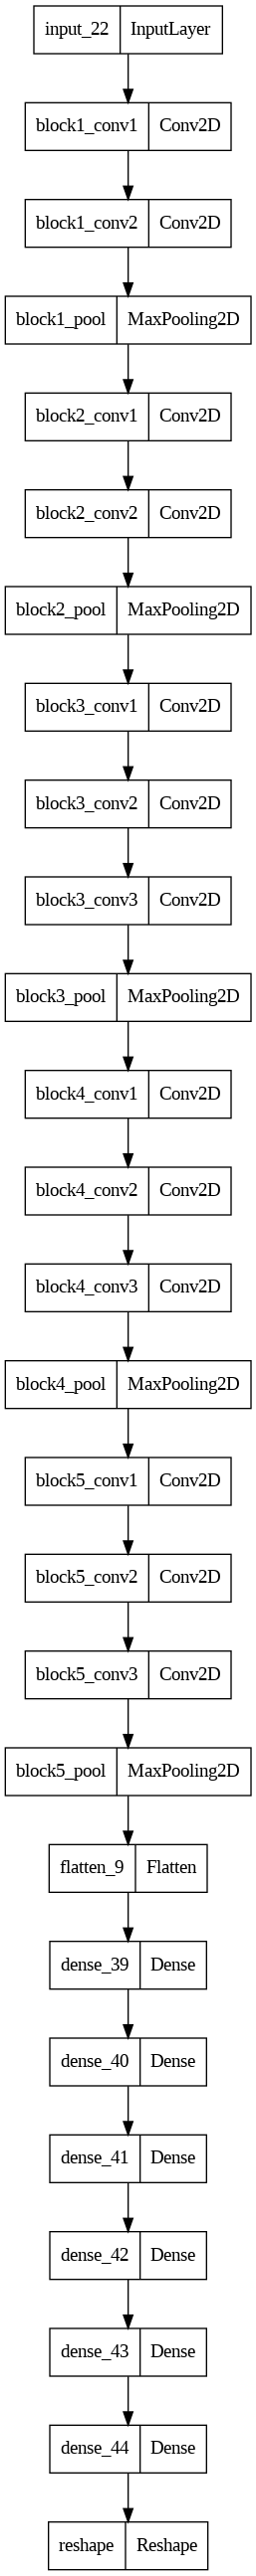

In [ ]:
keras.utils.plot_model(model)

In [ ]:
####### SAVE MODEL
#import os
#model.save(os.path.join('models','vgg16(2).h5'))
model.summary()

NameError: ignored

In [ ]:
#summary of model

model = model()
model.summary()

In [ ]:
#sketch2face
def show_images2(sketch, real, predicted):
    plt.figure(figsize = (12,12))
    plt.subplot(1,3,1)
    plt.title("Sketch",fontsize = 15, color = 'Lime')
    plt.imshow(sketch)
    plt.subplot(1,3,2)
    plt.title("Image",fontsize = 15, color = 'Blue')
    plt.imshow(real)
    plt.subplot(1,3,3)
    plt.title("Predicted",fontsize = 15, color = 'gold')
    plt.imshow(predicted)

1/1 [==============================] - 0s 20ms/step


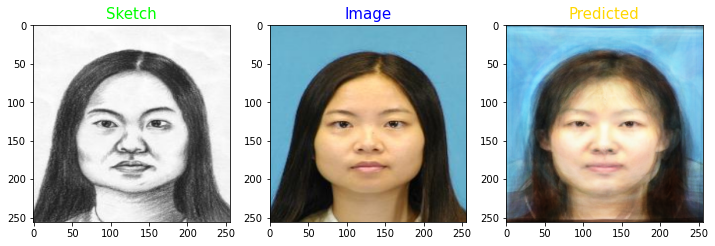

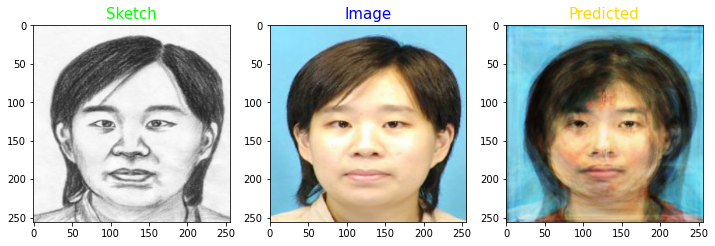

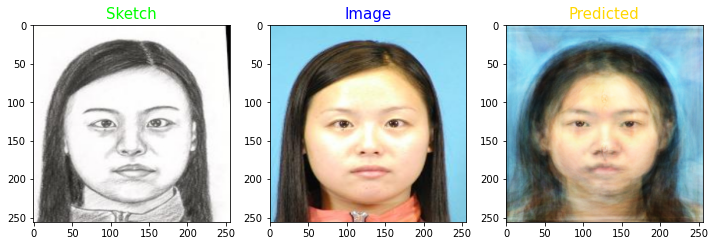

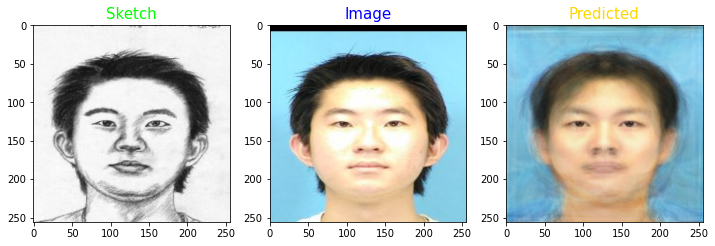

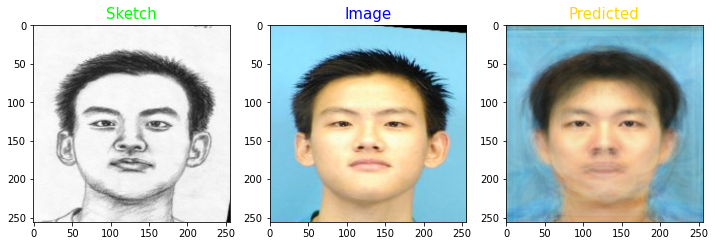

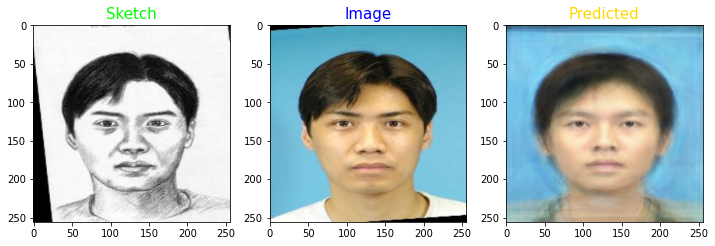

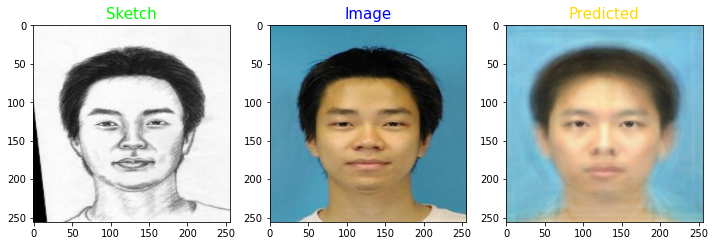

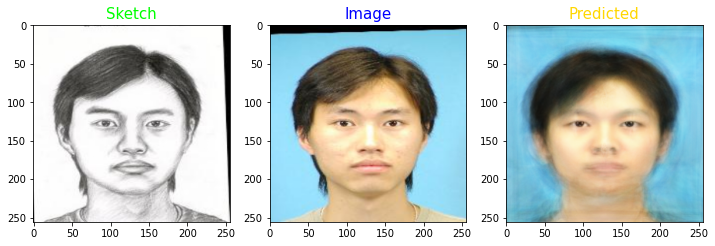

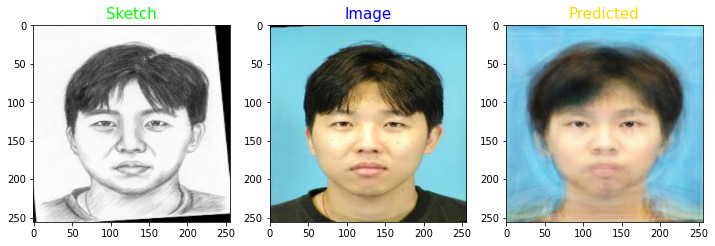

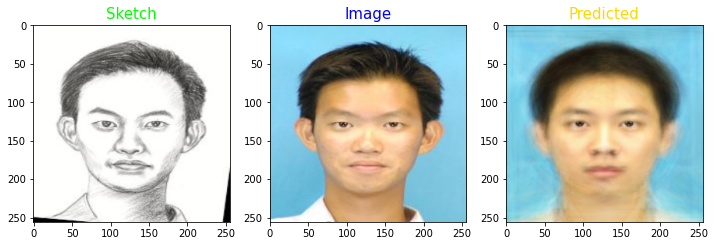

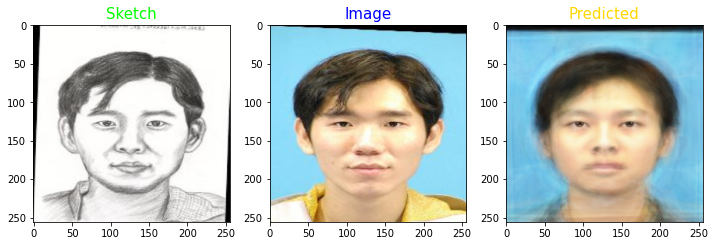

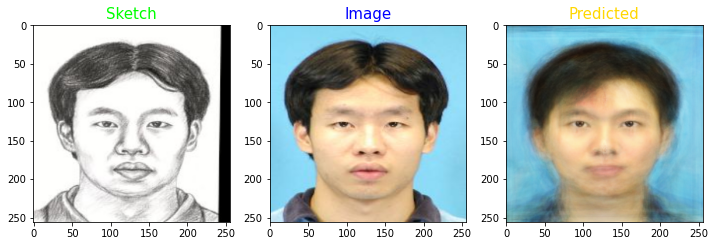

In [ ]:
#sketch2face
ls = [i for i in range(0,95,8)]
for i in ls:
    predicted =np.clip(model.predict(test_sketch_image[i].reshape(1,SIZE,SIZE,3)),0.0,1.0).reshape(SIZE,SIZE,3)
    show_images2(test_sketch_image[i],test_image[i],predicted)

In [ ]:
#save the model

#sketch2face
model.save("/content/drive/MyDrive/CUHK_data/Finalsketch2faceVGG16.h5")